In [2]:
import numpy as np
from matplotlib import pyplot as plt

schemes = ["NegotiaToR", "VLB"]

workloads = ["incast_degree2", "incast_degree5", "incast_degree10", "incast_degree15", "incast_degree20"]
labels = [2, 5, 10, 15, 20]
# workloads = ["permutation_size1", "permutation_size3",  "permutation_size5", "permutation_size10", "permutation_size30", "permutation_size50", "permutation_size100"]
myfontsize = 40

load = 'Pureincast'
# load = 'Permutation'
group = 1
data = np.zeros([2 * group, len(workloads)], dtype = float) 
for i, scheme in enumerate(schemes): 
    for group_index in range(group):  
        for j, workload in enumerate(workloads):
        
            dir_name = "../DATA/Count_BW_13/" + scheme + "_" + load + "/0/DATA_vote_" + workload
            # file_name = dir_name + "/GOODPUT.txt"
            # data[i][j] = np.loadtxt(file_name, usecols=(1,))[73]
            file_name = dir_name + "/FCT.txt"
            tmp = np.loadtxt(file_name)
            # print(tmp[4:5, :])
            # data[i][j] = np.mean(8*tmp[:, 4:5] / tmp[:,7:8]) / 1e9
            incast_finish_time = max(tmp[:, 7:8])
            first_index = int(10*1000/13)
            last_index = first_index + int(incast_finish_time / 13 * 1e9)       
            file_bandwidth = dir_name + "/RECEIVER_BANDWIDTH.txt"
            bandwidth = np.loadtxt(file_bandwidth, usecols=(73,))
            data[i * group + group_index][j] = np.sum(bandwidth[first_index:last_index]) * 8 / (incast_finish_time) / 1e9
            
            # data[i][j] = tmp[73]
# print(data)
data1 = data[0:group, :]
data2 = data[group:2*group, :]

data1_average = np.average(data1, axis=0)
data2_average = np.average(data2, axis=0)
# print(result1_average)
# print(result2_average)
data1_stdd = np.std(data1,axis=0)
data2_stdd = np.std(data2,axis=0)
print(data1_stdd)
print(data2_stdd)


[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


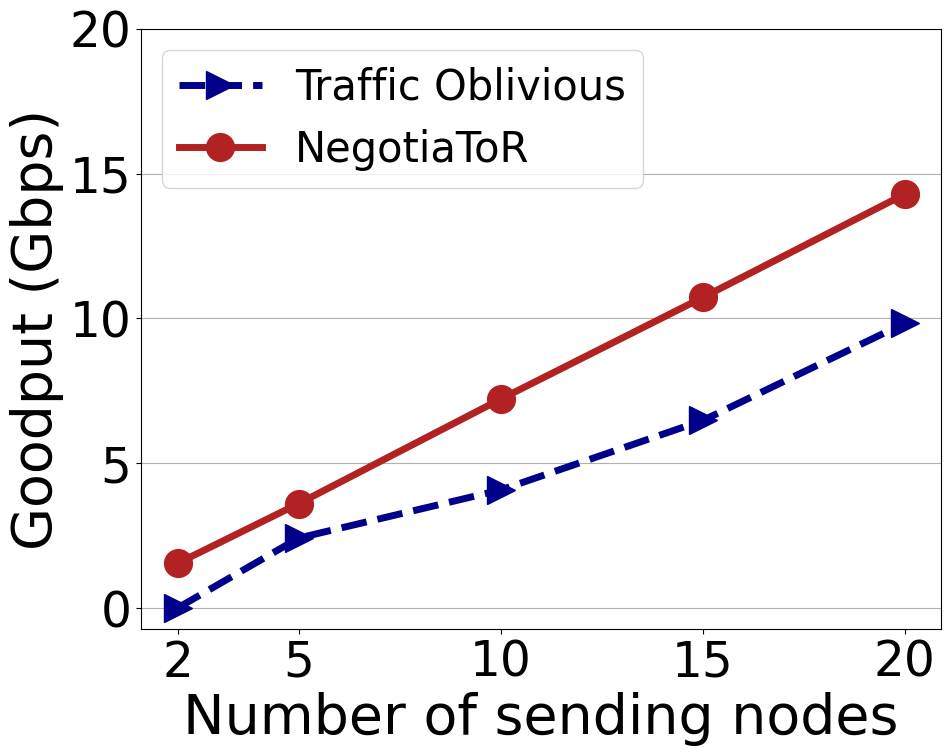

In [3]:
plt.figure(figsize=(10,8))
plt.plot(labels, data[1], color = 'darkblue', marker = '>', markersize=20, linestyle = '--', linewidth=5, label = "Traffic Oblivious")
plt.plot(labels, data[0], color = 'firebrick', marker = 'o', markersize=20, linestyle = 'solid', linewidth=5, label = "NegotiaToR")
# plt.errorbar(labels,data2_average,yerr=data1_stdd,fmt='>-',ecolor='darkblue',color='darkblue',elinewidth=1,linewidth=5,capsize=4,label = "Traffic Oblivious")
# plt.errorbar(labels,data1_average,yerr=data2_stdd,fmt='o-',ecolor='firebrick',color='firebrick',elinewidth=1,linewidth=5,capsize=4,label = "NegotiaToR")
plt.xlabel("Number of sending nodes", fontsize=myfontsize)
plt.ylabel("Goodput (Gbps)", fontsize=myfontsize)
plt.xticks([2, 5, 10, 15, 20], fontsize=myfontsize-5)
plt.yticks([0, 5, 10, 15, 20], fontsize=myfontsize-5)
plt.grid(axis='y')
# plt.xlim([0,20])
# plt.ylim([0,30])
plt.legend(loc = 'upper left' , fontsize=myfontsize-10)
# plt.title("Incast", fontsize=myfontsize)
plt.subplots_adjust(left=0.16, right=0.96, bottom=0.15, top=0.9)

plt.savefig("../FIGS/NegotiaToR Figs/5/incast-throughput.pdf")

# print(data)



In [8]:
import numpy as np
from matplotlib import pyplot as plt

schemes = ["NegotiaToR", "VLB"]

workloads = ["incast_degree2", "incast_degree5", "incast_degree10", "incast_degree15", "incast_degree20"]
# workloads = ["incast_degree2"]
labels = [2, 5, 10, 15, 20]
# workloads = ["permutation_size1", "permutation_size3",  "permutation_size5", "permutation_size10", "permutation_size30", "permutation_size50", "permutation_size100"]
myfontsize = 40


# print(data)


load = 'Pureincast'
# load = 'Permutation'
group = 1
result = np.zeros([2 * group, len(workloads)], dtype = float) 

for i, scheme in enumerate(schemes): 
    for group_index in range(group):  
        for j, workload in enumerate(workloads):
        
            dir_name = "../DATA/Count_BW_13/" + scheme + "_" + load + "/0/DATA_vote_" + workload
            file_name = dir_name + "/PACKET_SRC_DELAY.txt"
            data = np.loadtxt(file_name)
            delays = []
            for time, count in data:
                for _ in range(int(count)):
                    delays.append(time)
            print(delays)
            result[i * group + group_index][j] = np.percentile(delays, 99)
        # result[i][j] = np.mean(delays)
        # print(delay)

        # data[i][j] = tmp[73]
result = result / 10 # us
print(result)

result1 = result[0:group, :]
result2 = result[group:2*group, :]

result1_average = np.average(result1, axis=0)
result2_average = np.average(result2, axis=0)
# print(result1_average)
# print(result2_average)
result1_stdd = np.std(result1,axis=0)
result2_stdd = np.std(result2,axis=0)
print(result1_stdd)
print(result2_stdd)


[21.0, 24.0, 57.0, 61.0]
[21.0, 21.0, 27.0, 28.0, 29.0, 57.0, 58.0, 64.0, 65.0, 65.0]
[20.0, 20.0, 21.0, 21.0, 21.0, 26.0, 27.0, 29.0, 29.0, 29.0, 57.0, 57.0, 57.0, 58.0, 58.0, 62.0, 64.0, 65.0, 65.0, 65.0]
[21.0, 21.0, 22.0, 23.0, 23.0, 23.0, 23.0, 23.0, 24.0, 24.0, 25.0, 27.0, 27.0, 29.0, 29.0, 57.0, 57.0, 59.0, 59.0, 59.0, 59.0, 60.0, 60.0, 61.0, 61.0, 62.0, 64.0, 64.0, 65.0, 66.0]
[20.0, 20.0, 20.0, 21.0, 21.0, 23.0, 23.0, 23.0, 24.0, 25.0, 25.0, 25.0, 26.0, 26.0, 26.0, 27.0, 28.0, 29.0, 29.0, 29.0, 57.0, 57.0, 57.0, 57.0, 58.0, 59.0, 59.0, 59.0, 61.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 64.0, 65.0, 66.0, 66.0, 66.0]
[121.0, 136.0]
[120.0, 123.0, 124.0, 125.0, 132.0]
[106.0, 114.0, 116.0, 116.0, 118.0, 120.0, 120.0, 128.0, 129.0, 133.0]
[117.0, 119.0, 121.0, 123.0, 124.0, 125.0, 125.0, 126.0, 127.0, 127.0, 128.0, 128.0, 132.0, 134.0, 136.0]
[104.0, 107.0, 109.0, 109.0, 111.0, 112.0, 120.0, 121.0, 122.0, 123.0, 126.0, 126.0, 126.0, 126.0, 127.0, 128.0, 128.0, 129.0, 133.0, 135.0]
[[

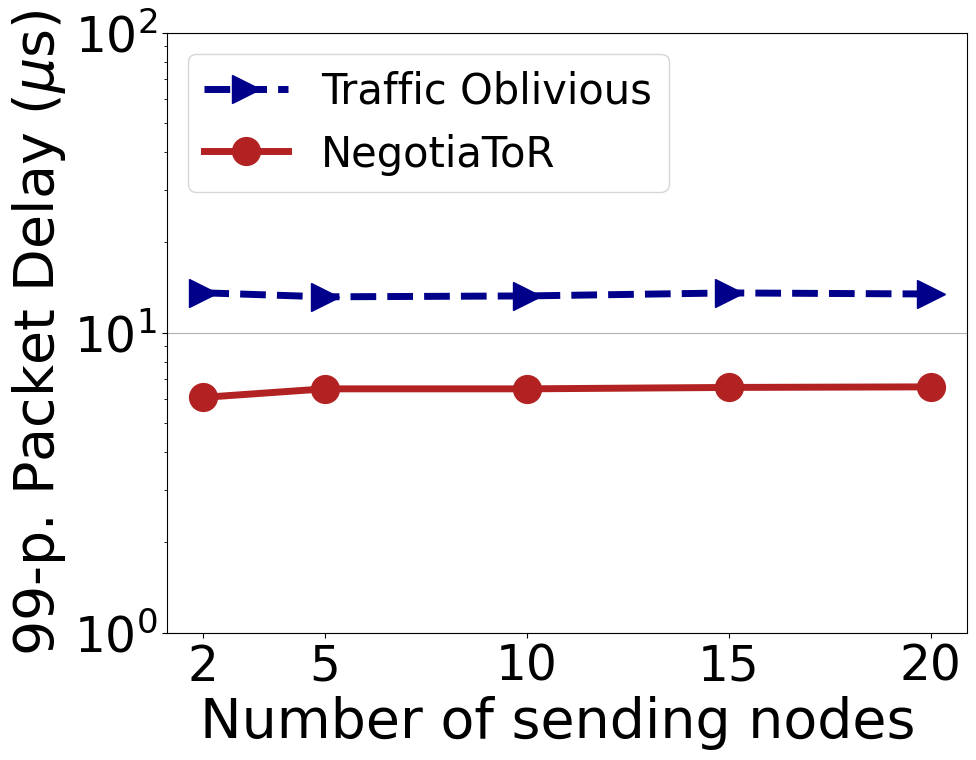

In [9]:

plt.figure(figsize=(10,8))
plt.plot(labels, result[1], color = 'darkblue', marker = '>', markersize=20, linestyle = '--', linewidth=5, label = "Traffic Oblivious")
plt.plot(labels, result[0], color = 'firebrick', marker = 'o', markersize=20, linestyle = 'solid', linewidth=5, label = "NegotiaToR")

plt.xlabel("Number of sending nodes ", fontsize=myfontsize)
plt.ylabel(r"99-p. Packet Delay ($\mu$s)", fontsize=myfontsize)
plt.xticks([2, 5, 10, 15, 20], fontsize=myfontsize-5)
plt.yticks(fontsize=myfontsize-5)
plt.ylim([10**0, 10**2])
plt.grid(axis='y')
plt.yscale('log')
plt.legend(loc = 'upper left' , fontsize=myfontsize-10)
# plt.title("Incast", fontsize=myfontsize)
plt.tight_layout()
plt.subplots_adjust(left=0.16, right=0.96, bottom=0.15, top=0.9)

plt.savefig("../FIGS/NegotiaToR Figs/5/incast-99src delay.pdf")